In [1]:
#import data library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ('Libraries loaded sucessfully')


Libraries loaded sucessfully


Load Dataset

In [3]:
df = pd.read_csv(r'C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\data\raw\train.csv')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Understanding the data

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape


(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking missing values in the dataset

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing values in the dataset

In [8]:
#Filled age with median
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\DOUBLE J\AppData\Local\Temp\ipykernel_11460\2778835670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [9]:
# Drop missing values in 'Cabin' and 'Embarked' columns
df.dropna(subset=['Cabin', 'Embarked'], inplace=True)


confirming mising values

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Visualization 1 - Survival Count

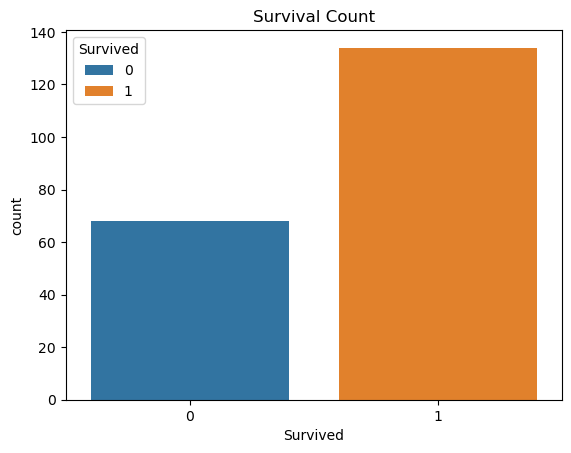

In [13]:
sns.countplot(x='Survived', data=df, hue="Survived")
plt.title("Survival Count")
plt.savefig(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\figures/Survival_count.png")
plt.show()

Visualization 2 - Survival by Gender

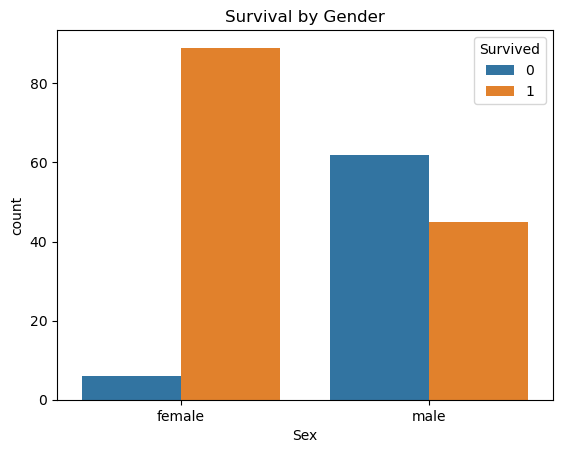

In [14]:
sns.countplot(x='Sex', data=df, hue='Survived')
plt.title("Survival by Gender")
plt.savefig(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\figures/Survival_By_Gender.png")
plt.show()

Visualization 3 - Survival by Class

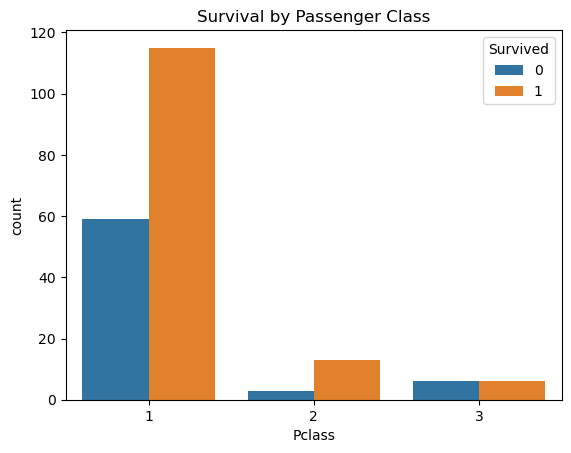

In [15]:
sns.countplot(x='Pclass', data=df, hue="Survived")
plt.title("Survival by Passenger Class")
plt.savefig(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\figures/Survival_By_Class.png")
plt.show()

Visualization 5 - Age Distribution

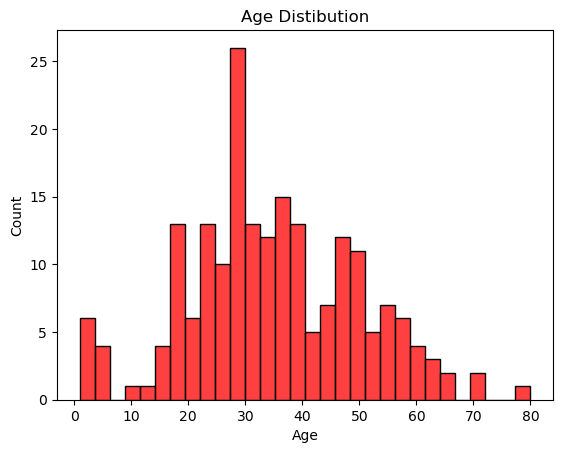

In [20]:
sns.histplot(df['Age'], bins=30, color="Red")
plt.title("Age Distibution")
plt.savefig(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\figures/Age_Distribution.png")
plt.show()

Visualization 5 - Correlation Heatmap

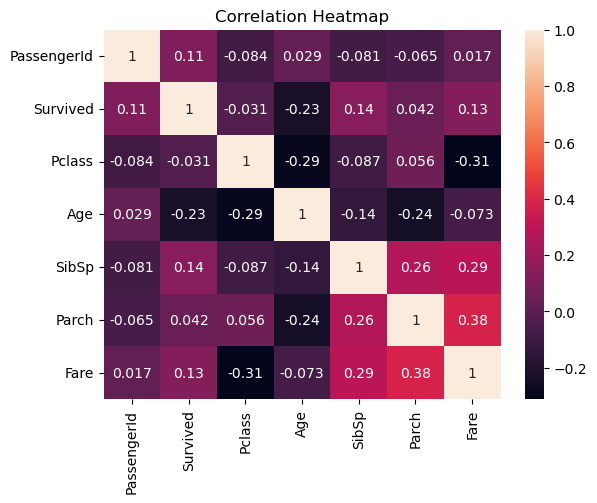

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.savefig(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\figures/Correlation_Heatmap.png")
plt.show()

Saving Clean Dataset

In [22]:
df.to_csv(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\data\processed/Cleaned_Titanic.csv", index=False)

### Key Insights
#### -Females had higher survival rate
#### -First Class passengers survived more
#### -Age had moderate impact
#### -Passenger class strongly influenced survival

Going futher to make my dataset machine learning ready and since i already have a clean dataset to beign i start by view my cleaned titanic dataset

In [13]:
df1 = pd.read_csv(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\data\processed\Cleaned_Titanic.csv")
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Beginning my machine learning process after confirming my cleaned dataset by encoding and processing the dataset so it can be understood since machine learning models need numbers. But before then i will be dropping columns which are not needed such as PassengerID, Cabin, Name, Ticket.


In [14]:
df1.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.0,1,0,71.2833,C
1,1,1,female,35.0,1,0,53.1000,S
2,0,1,male,54.0,0,0,51.8625,S
3,1,3,female,4.0,1,1,16.7000,S
4,1,1,female,58.0,0,0,26.5500,S


*Feature Encoding of Sex and Embarked to numbers*

In [17]:
le = LabelEncoder()

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Embarked'] = le.fit_transform(df1['Embarked'])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2


Defining Features and Target

In [18]:
X = df1.drop("Survived", axis=1)      # Features
y = df1["Survived"]                   # Target

In [19]:
X.head()  # Features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,38.0,1,0,71.2833,0
1,1,0,35.0,1,0,53.1000,2
2,1,1,54.0,0,0,51.8625,2
3,3,0,4.0,1,1,16.7000,2
4,1,0,58.0,0,0,26.5500,2


In [22]:
y.head()  #Target

0    1
1    1
2    0
3    1
4    1
Name: Survived, dtype: int64

*Train Test and Split*

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 199 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    161 non-null    int64  
 1   Sex       161 non-null    int64  
 2   Age       161 non-null    float64
 3   SibSp     161 non-null    int64  
 4   Parch     161 non-null    int64  
 5   Fare      161 non-null    float64
 6   Embarked  161 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 10.1 KB


In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 95 to 79
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    41 non-null     int64  
 1   Sex       41 non-null     int64  
 2   Age       41 non-null     float64
 3   SibSp     41 non-null     int64  
 4   Parch     41 non-null     int64  
 5   Fare      41 non-null     float64
 6   Embarked  41 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 2.6 KB


In [26]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 161 entries, 199 to 102
Series name: Survived
Non-Null Count  Dtype
--------------  -----
161 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [27]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 41 entries, 95 to 79
Series name: Survived
Non-Null Count  Dtype
--------------  -----
41 non-null     int64
dtypes: int64(1)
memory usage: 656.0 bytes


Feature Scaling

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [29]:
X_test

array([[-0.40245931,  0.88819417,  1.84687263,  1.06748999,  5.23204142,
         2.88591709,  0.76319137],
       [-0.40245931, -1.12587994, -0.81114407,  4.57495711,  2.30718493,
         2.88591709,  0.76319137],
       [-0.40245931, -1.12587994, -0.48699569, -0.68624357,  0.84475669,
        -0.22881277,  0.76319137],
       [-0.40245931, -1.12587994, -0.74631439, -0.68624357, -0.61767156,
        -0.31111052, -1.33721565],
       [-0.40245931, -1.12587994, -0.16284731,  1.06748999, -0.61767156,
        -0.25726463,  0.76319137],
       [-0.40245931,  0.88819417,  0.74476814, -0.68624357, -0.61767156,
        -0.54296922,  0.76319137],
       [-0.40245931, -1.12587994,  0.29096042,  1.06748999,  0.84475669,
         0.96167292, -1.33721565],
       [-0.40245931,  0.88819417, -1.07046277,  1.06748999, -0.61767156,
        -0.25726463,  0.76319137],
       [-0.40245931,  0.88819417,  0.80959782,  1.06748999, -0.61767156,
        -0.27373676,  0.76319137],
       [-0.40245931,  0.8881

In [30]:
X_train

array([[-0.40245931, -1.12587994,  1.32823522, ...,  0.84475669,
         0.19284827, -1.33721565],
       [-0.40245931, -1.12587994,  1.45789457, ..., -0.61767156,
         1.14168035, -1.33721565],
       [ 3.10002443, -1.12587994, -0.48699569, ...,  0.84475669,
        -0.71761122, -1.33721565],
       ...,
       [-0.40245931,  0.88819417, -0.48699569, ..., -0.61767156,
        -0.65484193,  0.76319137],
       [-0.40245931, -1.12587994,  0.48544944, ...,  0.84475669,
         2.11228857,  0.76319137],
       [-0.40245931,  0.88819417,  0.80959782, ..., -0.61767156,
        -0.65484193,  0.76319137]])

Train Model - Logistic Regression

In [31]:
LR = LogisticRegression()

LR.fit(X_train, y_train)

LogisticRegression()

Let make some predictions

In [32]:
y_pred = LR.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

Evaluate our Logistic Regression Model

In [38]:
print("Logistic Regression Accuracy", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy 0.8048780487804879


Confusion Matrix

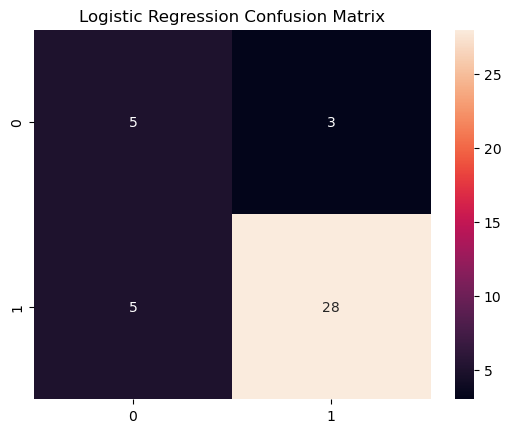

In [53]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Training a more advanced model - Random Forest

In [40]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)


RandomForestClassifier()

Predicting using the Random Forest Model

In [48]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

Checking Accuracy for random forest model

In [50]:
print("Random Forest Accuracy", accuracy_score(y_test, y_pred_RF))

Random Forest Accuracy 0.7560975609756098


Confusion Metrics Heat Map

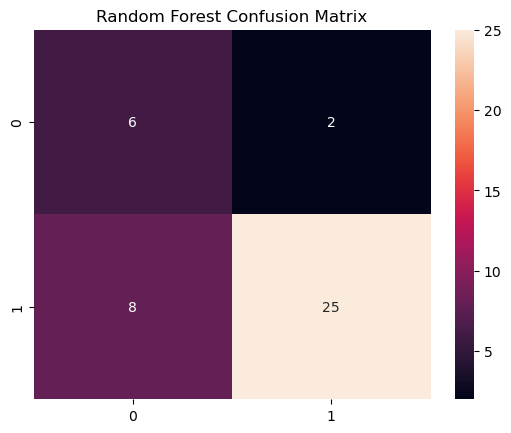

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True)
plt.title("Random Forest Confusion Matrix")
plt.show()

Saving Model

In [66]:
import joblib

joblib.dump(LR,r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\models\titanic_Logistic_regression_model.pkl")

['C:\\Users\\DOUBLE J\\Documents\\data-projects\\Titanic-analysis\\Outputs\\Visualization\\models\\titanic_Logistic_regression_model.pkl']

Feature Importance using Random Forest

In [65]:
# Get Feature Importance
importance = RF.feature_importances_

features = X.columns
features


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [61]:
feature_importance_df = pd.DataFrame({
    'Features': features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)
feature_importance_df


,Features,Importance
5,Fare,0.325275
2,Age,0.297360
1,Sex,0.219892
3,SibSp,0.050248
4,Parch,0.047507
6,Embarked,0.037951
0,Pclass,0.021766


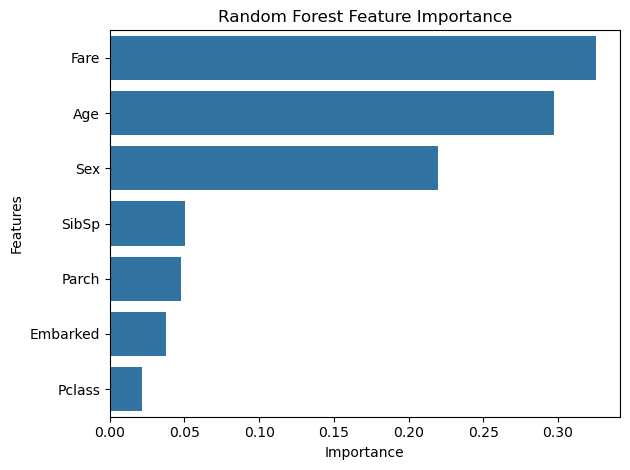

In [71]:
sns.barplot(x="Importance", y="Features", data=feature_importance_df)
plt.title("Random Forest Feature Importance")
plt.savefig(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\figures/Random_Forest_Feature_Importance.png")
plt.tight_layout()
plt.show()

Model Comparison: 
*Logistic Regression Vs Random Forest*

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
models = {
    "Logistic Regression": y_pred,
    "Random Forest": y_pred_RF
}

for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8049
Random Forest Accuracy: 0.7561


visualize in a bar chart

In [77]:
acc_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_RF)]
})
acc_df


,Model,Accuracy
0,Logistic Regression,0.804878
1,Random Forest,0.756098


C:\Users\DOUBLE J\AppData\Local\Temp\ipykernel_8572\2480560163.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="Set2")


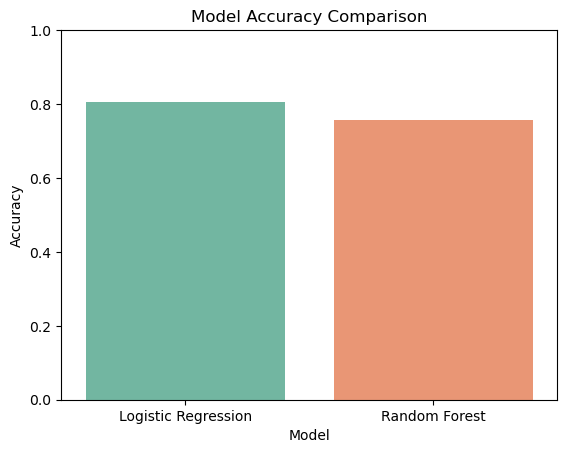

In [81]:
sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.savefig(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\Outputs\Visualization\figures/Model_Accuracy_Comparison.png")
plt.show()

Saving Clean Dataset processed for machine learning

In [82]:

df1.to_csv(r"C:\Users\DOUBLE J\Documents\data-projects\Titanic-analysis\data\processed/Final_Cleaned_Titanic_ML.csv", index=False)

Project Overview:
These project uses Machine learning to predict Titanic Passenger survival using Python, Pandas, Seaborn and Scikit-learn.

Update requirements.txt

pandas
numpy
matplotlib
seaborn
scikit-learn
joblib
jupyter

In [ ]:
update re

SyntaxError: invalid syntax (2565955254.py, line 1)